In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import sys
sys.version

from IPython import get_ipython
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt 
from PIL import Image, ImageOps
get_ipython().run_line_magic('matplotlib', 'inline')
import PIL, requests
from io import BytesIO
import random 

In [55]:
#Importa imagen

dire = 'https://www.adslzone.net/app/uploads/2020/02/bluetooth-hack.jpg'
re = requests.get(dire)

In [59]:
# Mapea imagen

img = Image.open(BytesIO(re.content))


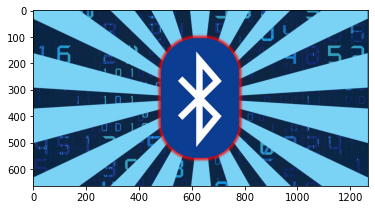

In [19]:
# Muestra imagen a array


plt.imshow(np.asarray(img))
plt.show()

In [95]:
# Imagen a array

I = np.asarray(img) # Se crea una matriz, para proceso de cuantización
print(I.shape)

(664, 1268, 3)


In [102]:
# Array a bits


bfl = np.unpackbits(I, axis=-1) # Se codifica la señal cuantizada
print(bfl.shape)


(664, 1268, 24)


In [98]:
#Matriz generadora

G = np.array([[1,1,0,1,0,0],[0,1,1,0,1,0],[1,0,1,0,0,1]])

print(G.shape)
u = np.dot(bfl_reshaped,G)
print(u.shape)

(3, 6)


ValueError: shapes (20206848,1) and (3,6) not aligned: 1 (dim 1) != 3 (dim 0)

In [42]:
# Agrega error


pe = np.random.permutation(bfl) # Se le aplica el error por el canal simétrico a la señal codificada

In [43]:
# Señal con error


bc = pe ^ bfl # señal despues de aplicar el error

print(bc.shape)



(664, 1268, 24)


In [72]:
# Decodifica


bflp = np.packbits(bc,axis=-1) # Se decofica la señal 
print(bflp.shape)

(664, 1268, 3)


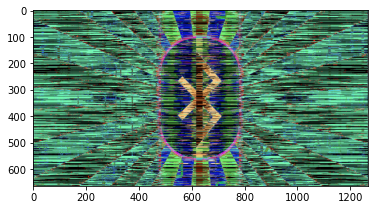

In [45]:
# Muestras imagen con error


plt.imshow(np.asarray(bflp))
plt.show()